In [1]:
#Importing data and functions
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
class PCA:
    
    def initiate(self, data, n_components = 2):
        self.n_samples = data.shape[0]
        self.n_components = n_components
        
        self.newdata = self.standardization(data)
        
        covmat = self.covariance_matrix()
        
        eigenvectors = self.eigenvectors(covmat)
        
        projmat = self.projection(eigenvectors)
        
        return projmat
    
    def standardization(self, data):
        #In here we substract the mean and dividing by standard deviation
        z = (data - np.mean(data, axis = 0)) / (np.std(data, axis = 0))
        return z
    
    def covariance_matrix(self, ddof=0):
        #We make a dot product with the transposed matrix and the normal matrix,
        #then dividing by the number of samples
        covmat = np.dot(self.newdata.T, self.newdata) / (self.n_samples-ddof)
        return covmat
    
    def eigenvectors(self, covmat):
        #Calculating eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(covmat)
        
        #Sorting eigenvalues in decending order
        n_cols = np.argsort(eigenvalues)[::-1][:self.n_components]
        
        #Selecting columns based on the number of components
        selected_Vectors = eigenvectors[:,n_cols]
        return selected_Vectors
    
    def projection(self, eigenvectors):
        P = np.dot(self.newdata, eigenvectors)
        return P

In [3]:
#Initialization of Variables
diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target

In [4]:
#Class Initialization
pca = PCA()

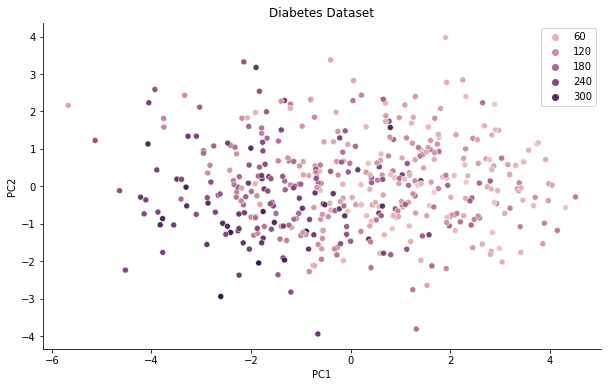

In [5]:
pca_data = pca.initiate(data, n_components = 2)

fig ,ax = plt.subplots(1, 1, figsize=(10,6))

#chart tags
ax.set_title('Diabetes Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')

#drawing the scatterplot
sns.scatterplot(
    x = pca_data[:,0],
    y = pca_data[:,1],
    hue = target
)


sns.despine()
plt.show()